# 3.Statistical analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

In [4]:
train = pd.read_csv('../data/Preprocessed/train.csv')
test = pd.read_csv('../data/Preprocessed/test.csv')

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_First',
       'FamilyCount', 'title'],
      dtype='object')

In [6]:
# we will select just the columns that we want to use in our analysis
trainML = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket','Fare', 'Embarked', 'FamilyCount','Cabin_First', 'title']]
trainML = trainML.dropna()

In [7]:
trainML.isnull().sum()


Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilyCount    0
Cabin_First    0
title          0
dtype: int64

## 3.1 Starting regressions


In [8]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

### 3.1.1 Logistic Regression: Survival on age

In [9]:
X_Age = trainML[['Age']].values
y = trainML['Survived'].values
# Use the fit method to train
lr_fit = log_reg.fit(X_Age,y)
# Make a prediction
y_predict = log_reg.predict(X_Age)
(y == y_predict).mean()

0.681592039800995

In [11]:
lr_fit.intercept_, lr_fit.coef_

(array([1.89605796]), array([[-0.03385215]]))

### 3.1.2 Logistic regression: Survival on sex / Pclass

In [13]:
X_sex = pd.get_dummies(trainML['Sex']).values
y = trainML['Survived'].values
# Use the fit method to train
lr_fit2 = log_reg.fit(X_sex, y)
# Make a prediction
y_predict = log_reg.predict(X_sex)
(y == y_predict).mean()

0.746268656716418

In [14]:
lr_fit2.intercept_, lr_fit2.coef_

(array([1.09823808]), array([[ 1.36647694, -1.36648476]]))

### 3.1.3 random Random forest (on numerical variables)

In [10]:
from sklearn.ensemble import RandomForestClassifier
X = trainML[['Age', 'SibSp', 'Parch',
       'Fare', 'FamilyCount']].values # Taking all the numerical values
y = trainML['Survived'].values
RF = RandomForestClassifier()
RF.fit(X, y)
# Make a prediction
y_predict = RF.predict(X)
(y == y_predict).mean()


0.9950248756218906

## 3.2 Logistic regression
It is useful in the prediction on a binary output variable. To perform it we will use the logistic function, which is the canonical link function in the GLM framework, and this one will be maximized using the log-likelyhood. In a nutshell this means that we will not define the response Y directly, but we will model the porbability that Y belongs to a particular category fiven the input.
From a computationperspective, we will have to remember that to define the maximum of the likelyhood will be necessary to compute the derivative of the log-likelyhood. The derivative will not be anymore linear in \beta and this means that the porblem doesn't have a closed form solution. We will have a iterative algorithm:
- Newton Rapson: at every step we will have to compute the inverse of (X^T W(t) X) where W(t) changes at every step, then it is computationally expensive
- Majorize Minimize: minimize the loss funcition by approximating it with a simpler one


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
train_ML = train[['Age', 'SibSp', 'Parch','Fare', 'FamilyCount','Survived']]
X = train_ML.drop('Survived', axis = 1)
y = train_ML['Survived']

In [18]:
log_reg.fit(X, y)
y_pred = log_reg.predict(X)
y_pred
(y == y_pred).mean()

0.6936026936026936

### 3.2.1.Accuracy scores and confusion matrix on basic Multiple logistic regression
To actually evaluate the performance of our model would be necessary to know what are the actual results, ten, as in our case, we will rely on a train, test split to evaluate if it is actually good at predicting the result. The following will be useful as metrics to compare different ML models' performance

In [19]:
from sklearn.model_selection import train_test_split
X = train_ML.drop('Survived', axis = 1)
y = train_ML['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [20]:
lr_fit3 = log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0])

In [22]:
lr_fit3.intercept_, lr_fit3.coef_

(array([-0.15274177]),
 array([[-0.02456292, -0.23577847,  0.15426876,  0.01773984, -0.08150971]]))

In [18]:
accuracy_score(y_pred, y_test)

0.711864406779661

In [19]:
confusion_matrix(y_pred, y_test)

array([[178,  79],
       [  6,  32]])

### 3.2.2.Adding categorical variables


In [24]:
train_cat = pd.get_dummies(train, columns=['Sex', 'Pclass','Embarked'], drop_first=True).drop(['title','Cabin','Ticket','Name','Cabin_First'],axis = 1)

In [25]:
train_cat.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilyCount,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,22,1,0,7.2500,1,1,0,1,0,1
1,2,1,38,1,0,71.2833,1,0,0,0,0,0
2,3,1,26,0,0,7.9250,0,0,0,1,0,1
3,4,1,35,1,0,53.1000,1,0,0,0,0,1
4,5,0,35,0,0,8.0500,0,1,0,1,0,1


In [26]:
X = train_cat.drop('Survived', axis = 1)
y = train_cat['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
lr_fit4 = log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

/Users/valedipalo/venvs/demoenv39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1])

In [27]:
lr_fit4.intercept_, lr_fit4.coef_

(array([1.52065104]),
 array([[ 2.76503904e-04, -1.96957257e-02, -2.45294882e-01,
          5.78795778e-02,  1.27398236e-02, -1.87415304e-01,
         -2.54133823e+00,  3.90827533e-01, -4.65600352e-01,
          2.81148893e-01,  1.13356854e-02]]))

In [28]:
accuracy_score(y_pred, y_test)


0.7898305084745763

In [24]:
confusion_matrix(y_pred, y_test)

array([[157,  35],
       [ 27,  76]])

### 3.2.3.Cross-Validation [ TO REVIEW ]
We will use cross-validation to evaluate how different machine learning method compare. cross-validation > validation set appraoch. In particular by using cross validation w e will obtain a more accurate estimate of the out of sample accuracy. The estimates obtained troufh cross validation will be less impacted bu the variance.

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.75       0.78333333 0.85       0.71666667 0.8        0.76666667
 0.72881356 0.86440678 0.83050847 0.81355932]


/Users/valedipalo/venvs/demoenv39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/valedipalo/venvs/demoenv39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

### 3.2.4 Conclusion
In this section we evaluated the basis of the model, now we want to obtain some basic results for test actual test dataset

In [86]:
test = pd.read_csv('../data/Preprocessed/test.csv')

In [88]:
train_ML = train[['Age', 'SibSp', 'Parch','Fare', 'FamilyCount','Survived']]
X_real_test = test[['Age', 'SibSp', 'Parch','Fare', 'FamilyCount']]
X = train_ML.drop('Survived', axis = 1)
y = train_ML['Survived']
log_reg.fit(X, y)
y_pred = log_reg.predict(X_real_test)


In [95]:
#results with categorical variables
log_reg2 = LogisticRegression(solver = 'sag', max_iter=10000)
test_cat = pd.get_dummies(test, columns=['Sex', 'Pclass','Embarked'], drop_first=True).drop(['title','Cabin','Ticket','Name','Cabin_First'],axis = 1)

X_cat = train_cat.drop('Survived', axis = 1)
y_cat = train_cat['Survived']
log_reg2.fit(X_cat, y_cat)
y_cat_pred = log_reg2.predict(test_cat)


### 3.2.5. SUBMIT

In [115]:

pd.DataFrame({'PassengerId': test_cat.PassengerId, 'Survived': y_pred}).to_csv('../Kaggletest/basiclr.csv', index=False)
pd.DataFrame({'PassengerId': test_cat.PassengerId, 'Survived': y_cat_pred}).to_csv('../Kaggletest/catlr.csv', index=False)

In [109]:
test_cat




,PassengerId,Age,SibSp,Parch,Fare,FamilyCount,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,892,34,0,0,7.8292,0.0,1,0,1,1,0
1,893,47,1,0,7.0000,1.0,0,0,1,0,1
2,894,62,0,0,9.6875,0.0,1,1,0,1,0
3,895,27,0,0,8.6625,0.0,1,0,1,0,1
4,896,22,1,1,12.2875,1.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30,0,0,8.0500,0.0,1,0,1,0,1
414,1306,39,0,0,108.9000,0.0,0,0,0,0,0
415,1307,38,0,0,7.2500,0.0,1,0,1,0,1
416,1308,30,0,0,8.0500,1.0,1,0,1,0,1


In [107]:
test_cat

,PassengerId,Age,SibSp,Parch,Fare,FamilyCount,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,892,34,0,0,7.8292,0.0,1,0,1,1,0
1,893,47,1,0,7.0000,1.0,0,0,1,0,1
2,894,62,0,0,9.6875,0.0,1,1,0,1,0
3,895,27,0,0,8.6625,0.0,1,0,1,0,1
4,896,22,1,1,12.2875,1.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30,0,0,8.0500,0.0,1,0,1,0,1
414,1306,39,0,0,108.9000,0.0,0,0,0,0,0
415,1307,38,0,0,7.2500,0.0,1,0,1,0,1
416,1308,30,0,0,8.0500,1.0,1,0,1,0,1


## 3.3 Linear Discriminant Analysis
In general discriminant analysis is better performing when the two classes are well separated, furthermore it is easly extendable (and then preferable) in the case in which we have a multiclass classification problem. In our case we will start with LDA and proceed with QDA to evaluate how the results will change. These methods, being less robust, are generally less reliable then Logistic regression, unless all the assumptions are met.



In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = train_cat.drop('Survived', axis = 1)
y = train_cat['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

lda_model = LinearDiscriminantAnalysis()
lda_fit = lda_model.fit(X_train, y_train)

In [30]:
lda_fit.priors_ # group priors (proportion

array([0.61241611, 0.38758389])

In [37]:
print(X.shape[1])
lda_fit.means_ # group means

11


array([[4.52027397e+02, 3.04082192e+01, 5.80821918e-01, 3.53424658e-01,
        2.37487823e+01, 9.34246575e-01, 8.63013699e-01, 1.80821918e-01,
        6.68493151e-01, 9.04109589e-02, 7.89041096e-01],
       [4.42519481e+02, 2.84155844e+01, 4.50216450e-01, 4.58874459e-01,
        4.72652247e+01, 9.09090909e-01, 3.29004329e-01, 2.59740260e-01,
        3.33333333e-01, 9.09090909e-02, 6.45021645e-01]])

In [32]:
lda_fit.scalings_ # coefficients of ld

array([[-2.80315345e-05],
       [-2.47817749e-02],
       [-1.21238113e-01],
       [-1.84052818e-02],
       [ 1.81038395e-03],
       [-6.18175919e-02],
       [-2.12144557e+00],
       [-5.65607615e-01],
       [-1.31202278e+00],
       [-7.75065395e-02],
       [-3.49575800e-01]])

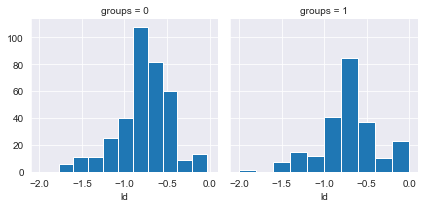

In [33]:
ld_sc = X_train.iloc[:, 0] * lda_fit.scalings_[0] + X_train.iloc[:, 1] * lda_fit.scalings_[1]

ld = pd.DataFrame({'groups': y_train, 'ld': ld_sc})

g = sns.FacetGrid(ld, col='groups')
g.map(plt.hist, 'ld');

In [38]:
# prediction summary
pd.DataFrame({'prob_0': lda_fit.predict_proba(X_test)[:, 0],
              'prob_1': lda_fit.predict_proba(X_test)[:, 1],
              'pred_class': lda_fit.predict(X_test)},
             columns=['prob_0', 'prob_1', 'pred_class'])


,prob_0,prob_1,pred_class
0,0.899998,0.100002,0
1,0.943475,0.056525,0
2,0.938394,0.061606,0
3,0.023943,0.976057,1
4,0.245513,0.754487,1
...,...,...,...
290,0.819063,0.180937,0
291,0.883378,0.116622,0
292,0.243929,0.756071,1
293,0.189307,0.810693,1


In [43]:
confusion_matrix(y_test, lda_fit.predict(X_test))

array([[153,  31],
       [ 32,  79]])

In [45]:
accuracy_score(lda_fit.predict(X_test), y_test)


0.7864406779661017

## 3.4 Quadratic discriminant analysis


In [46]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
X = train_cat.drop('Survived', axis = 1)
y = train_cat['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
qda_model = QuadraticDiscriminantAnalysis()
qda_fit = qda_model.fit(X_train, y_train)

/Users/valedipalo/venvs/demoenv39/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [47]:
qda_fit.means_ # group means

array([[4.52027397e+02, 3.04082192e+01, 5.80821918e-01, 3.53424658e-01,
        2.37487823e+01, 9.34246575e-01, 8.63013699e-01, 1.80821918e-01,
        6.68493151e-01, 9.04109589e-02, 7.89041096e-01],
       [4.42519481e+02, 2.84155844e+01, 4.50216450e-01, 4.58874459e-01,
        4.72652247e+01, 9.09090909e-01, 3.29004329e-01, 2.59740260e-01,
        3.33333333e-01, 9.09090909e-02, 6.45021645e-01]])

In [48]:
qda_fit.scalings_ # coefficients of ld

[array([6.84408223e+04, 9.98126434e+02, 1.52416604e+02, 4.94781981e+00,
        5.54029191e-01, 2.79989901e-01, 1.85872720e-01, 9.95325683e-02,
        4.19315395e-02, 3.05747474e-02, 2.84791750e-32]),
 array([6.38314255e+04, 3.99046506e+03, 1.81940966e+02, 1.82613643e+00,
        3.70001393e-01, 3.19502489e-01, 2.52982541e-01, 1.58497672e-01,
        7.84256264e-02, 4.32590098e-02, 2.55966091e-32])]

In [49]:
confusion_matrix(y_test, qda_fit.predict(X_test))


array([[173,  11],
       [ 85,  26]])

In [50]:
accuracy_score(y_test, qda_fit.predict(X_test))


0.6745762711864407

##
